In [1]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import random
import time
import pandas as pd

# Intro to Linear programming (linprog)
The function **linprog** can minimize a linear objective function subject to linear equality and inequality constraints. LP solves problems of the following form: min  $c^T x$ such that

$A_{ub} \le b_{ub}$, $A_{eq}x=b_{eq}$, $l \le x \le u$, where x is a vector of decision variables; c, $b_{ub}$, $b_{eq}$, l, and u are vectors; and $A_{ub}$ and $A_{eq}$ are matrices.

source:
1. https://docs.scipy.org/doc/scipy/tutorial/optimize.html#linear-programming-linprog
2. https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/master/lessons/00/intro_to_latex.ipynb


**Linear programming(LP) example 1**

consider the following simple LP problem:

$max 29x_1+45x_2+0x_3+0x_4$ such that 
*   $x_1-x_2-3x_3\le5$
*   $2x_1-3x_2-7x_3+3x_4\ge 10$ => $-2x_1+3x_2+7x_3-3x_4 \le -10$
------------
*   $2x_1+8x_2+x_3=60$
*   $4x_1+4x_2+x_4=60$
--------------
*   $0\le x_0$
*   $0 \le x_1 \le 5$
*   $x_2 \le 0.5$
*   $-3 \le x_3$














In [2]:
#we want to maximize the objective function, but linprog can only accept a minimization problem. 
c = np.array([-29.0, -45.0, 0.0, 0.0])#coefficient vector for the linear function

#inequality constraint1: "less than equal<= constraints"
A_ub = np.array([[1.0, -1.0, -3.0, 0.0],[-2.0, 3.0, 7.0, -3.0]])
b_ub = np.array([5.0, -10.0])

#inequality constraint2:"= constraints"
A_eq = np.array([[2.0, 8.0, 1.0, 0.0], [4.0, 4.0, 0.0, 1.0]])
b_eq = np.array([60.0, 60.0])


#“box constraints” or “simple bounds”: inequality constraints on individual decision variables
x0_bounds = (0, None)
#meaning that the lower bound on each decision variable is 0, and the upper bound on each decision variable is infinity
x1_bounds = (0, 6)
x2_bounds = (-np.inf, 0.5)  # +/- np.inf can be used instead of None
x3_bounds = (-3.0, None)
bounds = [x0_bounds, x1_bounds, x2_bounds, x3_bounds]
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='revised simplex')
print(result)
#If we need greater accuracy, typically at the expense of speed, we can solve using the revised simplex method:

     con: array([0., 0.])
     fun: -505.97435897435895
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([ 8.88178420e-16, -3.55271368e-15])
  status: 0
 success: True
       x: array([ 9.41025641,  5.17948718, -0.25641026,  1.64102564])


**Linear Programming example 2: **

max $6x_1+8x_2+5x_3+9x_4$ <=> min $-6x_1-8x_2-5x_3-9x_4$

subject to the following constraints:
*   $2x_1+x_2+x_3+3x_4 \le 5$
*   $x_1+x_2+x_3+2x_4 \le 3$
----------
*   $x_1,x_2,x_3,x_4 \ge 0$





In [3]:
#maximize 6x1+8x2+5x3+9x4
f=np.array([-6,-8,-5,-9])
#constraints 
#(1)x1,x2,x3,x4>=0
#(2)2x1+1x2+1x3+3x4<=5
#(3)1x1+1x2+1x3+2x4<=3
A_u=np.array([[2,1,1,3],[1,1,1,2]])
b_u=np.array([5,3])
b1=(0, None)
b2=(0, None)
b3=(0, None)
b4=(0, None)
bds=[b1,b2,b3,b3]
res=linprog(f,A_ub=A_u,b_ub=b_u,bounds=bds)
print(res)

     con: array([], dtype=float64)
     fun: -24.000000022902373
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 2.00000000e+00, -3.47540796e-09])
  status: 0
 success: True
       x: array([2.46119736e-10, 3.00000000e+00, 4.30285117e-10, 4.45399113e-10])


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


LP example 3:

find the max for $f(x_1,x_2)=x_1+x_2$ subject to the following constraints: <=> find min for $-x_1-x_2$
*   $x_1,x_2 \ge0$
*   $x_2-x_1 \le 1$
*   $x_1+6x_2 \le 15$
*   $4x_1-x_2 \le 10$





In [4]:
func1=np.array([-1,-1])#"c"; objective function to be minimized
A_u1=np.array([[-1,1],[1,6],[4,-1]])#"A_ub"
b_u1=np.array([1,15,10])#"b_ub"
#no such constraints for "A_eq" and "b_eq"
bounds=[b1,b2]#bounds for decision variables

res=linprog(func1,A_ub=A_u1,b_ub=b_u1,bounds=bounds)#applying linprog
print(res)

     con: array([], dtype=float64)
     fun: -4.999999999582599
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([2.00000000e+00, 1.61717040e-09, 4.69835726e-10])
  status: 0
 success: True
       x: array([3., 2.])


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<Figure size 576x576 with 0 Axes>

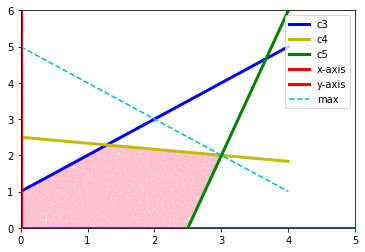

<Figure size 576x576 with 0 Axes>

In [5]:
x1=np.arange(0,5,1)#x1>=0
x2=np.arange(0,5,1)#x2>=0
c3=1+x1#condition3: x2-x1>=0; x2=1+x1
c4=15/6-x1/6#condition4: x1+6x2<=15; x2=(15-x1)/6
c5=4*x1-10#condition5: 4x1-x2<=10; x2>=4x1-10
plt.plot(x1,c3,'b',label="c3",linewidth=3)
plt.plot(x1,c4,'y',label="c4",linewidth=3)
plt.plot(x1,c5,'g',label="c5",linewidth=3)
plt.axhline(y=0, color='r',linestyle='-',label="x-axis",linewidth=3)
plt.axvline(x=0, color='r', linestyle='-', label = 'y-axis',linewidth=3)
plt.xlim(0,5)
plt.ylim(0,6)
# plt.fill_between(x1,c5,c3,where=c3>c5)
# plt.fill_between(x1,c5,c4,where=c4>c5)

#x1+x2=c; max(c)=5; objective function
y=5-x1
plt.plot(x1,y,'c--',label="max",)
# plt.plot(x1,4-x1,'m--',label="possible c")
# plt.plot(x1,3-x1,'m--')
# plt.plot(x1,2-x1,'m--')
# plt.plot(x1,1-x1,'m--')
plt.legend(loc="upper right")

#plot compact domain
n=100000
x11=np.zeros(n)
x22=np.zeros(n)
for i in range(0,n):
  x11[i]=random.random()*5
  x22[i]=random.random()*5
px1=[]
px2=[]
for i in range(0,n):
  if x22[i]-x11[i]<=1: 
    if x11[i]+6*x22[i]<=15:
      if 4*x11[i]-x22[i]<=10:
        px1.append(x11[i])
        px2.append(x22[i])
px1=np.array(px1)
px2=np.array(px2)    
plt.scatter(px1,px2,s=0.2,c="pink")
plt.figure(figsize=(8,8))
# #change the background color
# ax = plt.axes() 
# ax.set_facecolor('grey')


# Application of LP: Data Fitting 1; MinMax

LP has many different applications, such as nutrition, production, and politics. For this project, we will use linear optimization for data fitting. Given the data, we wish to find the straight line that “best” fits the data. 
Let $y_i$ be the ith given y-value(exact) and $a_0x_i+a_1$ denote the ith value on the approximating line. There are different approaches we can take to determine the best linear approximation.

*   Absolute deviation: find values of $a_0$ and $a_1$ to minimize $E_1(a_0,a_1)=\sum_{i=1}^{n}|y_i-(a_0x_i+a_1)|$.
*   Minmax problem: $E_{\infty}(a_0,a_1)=max_{1 \le i \le n}{|y_i-(a_0x_i+a_1)|}
$.
--------
*  Linear least square error: find values of $a_0$ and $a_1$ to minimize the sum of the squares of the differences between the y-values on the approximating line and the given y-values; $E_2(a_0,a_1)=\sum_{i=1}^{n}[y_i-(a_0x_i+a_1)]^2$.




**Generate Data**

Text(0.5, 1.0, 'Figure 1: data')

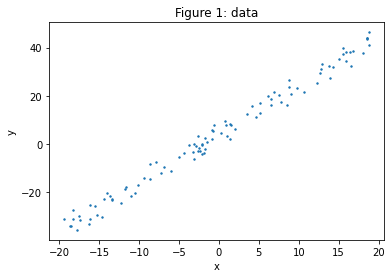

In [6]:
random.seed(10)
z=[random.uniform(-5,5)]#noise
x=[random.uniform(-20,20)]#x: dependent variable
for i in range(1,100):
  z.append(random.uniform(-5,5))
  x.append(random.uniform(-20,20))
x=np.array(x)
z=np.array(z)
y=2*x+z+4
plt.scatter(x,y,s=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 1: data")

**MinMax**

$E_{\infty}(a_0,a_1)=max_{1 \le i \le n}{|y_i-(a_0x_i+a_1)|}
=\xi_{max} $.

By the definition of the max, we have the following constraints:

$|y_i-(a_0x_i+a_1)| \le \xi_{max}$ for i=1,2,3...n

=>$-\xi_{max} \le y_i-(a_0x_i+a_1) \le \xi_{max}$

given n data points, there will be 2n constraints, each pair of which will need to be written as: 
*   $a_0x_i+a_1- \xi_{max} \le y_i $
*   $-a_0x_i-a_1- \xi_{max} \le -y_i$

The unknowns here are the $a_0$, $a_1$, and $\xi_{max}$. We want to 

minimize $0*a_0+0*a_1+\xi_{max}$ such that 

$\left[
\begin{array}{ccc}
x_1 & 1 & -1 \\
x_2 & 1 & -1\\
... & .... & ...\\
x_n & 1 & -1\\
-x_1 & -1 & -1 \\
-x_2 & -1 & -1\\
... & .... & ...\\
-x_n & -1 & -1
\end{array}
\right] \left[
\begin{array}{ccc}
a_0\\
a_1\\
\xi_{max}
\end{array}
\right] \le \left[
\begin{array}{ccc}
y_1 \\
y_2\\
...\\
y_n\\
-y_1 \\
-y_2\\
...\\
-y_n
\end{array}
\right]$



     con: array([], dtype=float64)
     fun: 4.9777779120534875
 message: 'Optimization terminated successfully.'
     nit: 211
   slack: array([ 5.68969111e+00,  5.76487965e+00,  8.09417064e+00,  6.52040110e+00,
        5.18612648e+00,  2.45610969e+00,  9.95555582e+00,  8.57078083e+00,
        3.79713800e+00,  6.72427247e+00,  6.82559972e+00,  1.29281693e+00,
        9.77965794e+00,  6.12326512e+00,  2.72055773e-02,  9.39038386e+00,
        3.61963417e+00,  3.11482838e+00,  4.34953394e+00,  5.80565731e+00,
        1.54747764e+00,  4.11897234e+00,  4.92720200e+00,  6.55067721e+00,
        8.53732596e+00,  5.65005865e+00,  6.00048421e+00,  7.74317348e+00,
        1.62519695e+00,  9.45244260e+00,  4.12330747e+00,  2.71568040e+00,
        1.77179816e+00,  4.54284892e+00,  6.44830083e+00,  7.74886962e+00,
        3.45116080e+00,  1.51804636e-02,  3.29631622e+00,  7.74201300e-01,
        5.80558202e+00,  8.66201156e+00,  2.38615317e+00,  9.07760433e+00,
        6.01035579e+00,  4.86831339e+

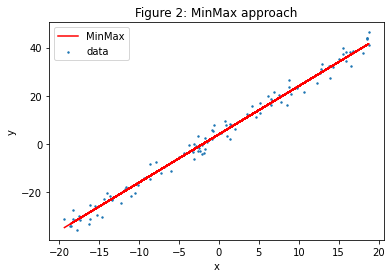

In [7]:
ONE=np.ones(len(x))
A_upper=np.column_stack((x,ONE))
A_upper=np.column_stack((A_upper,-ONE))
A_lower=np.column_stack((-x,-ONE))
A_lower=np.column_stack((A_lower,-ONE))
A_up=np.vstack((A_upper,A_lower))
b_u=np.concatenate((y, -y), axis=None)
lp1=linprog(np.array([0,0,1]),A_ub=A_up,b_ub=b_u, method='simplex',)
# print(lp1.x)
print(lp1)
slp1=lp1.x[0]
yint1=lp1.x[1]

plt.scatter(x,y,label="data",s=2)
plt.plot(x,slp1*x+yint1,'r',label="MinMax")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 2: MinMax approach")

y_predicted=slp1*x+yint1
def calculating_R(y,y1):
  print("R^2 (coefficient of determinant)")
  corr_matrix=np.corrcoef(y,y1)
  corr=corr_matrix[0,1]
  R_sq=corr**2
  print(R_sq)
  return R_sq

rs1=calculating_R(y,y_predicted)


# Application of LP: Data Fitting 2; Absolute Deviation

$E_1(a_0,a_1)=\sum_{i=1}^{n}|y_i-(a_0x_i+a_1)|$

The objective function for LP must be linear (and not involve the absolute
value function). We can get around this by creating a set of $n$ new variables, $d_i$, where $d_i=|y_i-(a_0x_i+a_1)|$.

Our object function will be $c^T x$, where $c=[0,0,1,1...1]$ and $x=[a_0, a_1,d_1,d_2...d_n]$
Loosening the definition of $d_i$ somewhat will give us 2n inequality constraints:
*   $y_i-(a_0x_i+a_1) \le d_i$
*   $-y_i+(a_0x_i+a_1) \le d_i$

The unknowns here are the $a_0$, $a_1$, $d_1$, $d_2$...$d_n$. We want to minimize $0*a_0+0*a_1+1*d_1+1*d_2+...1*d_n$ such that 

$\left[
\begin{array}{ccc}
x_1 & 1 & -1 & 0 & 0 & ... & 0\\
x_2 & 1 & 0 & -1 & 0 & ... & 0\\
... & .... & ... & ... & .... & ... & ...\\
x_n & 1 & 0 & 0 & ... & ... & -1\\
-x_1 & -1 & -1 & 0 & 0 & ... & 0\\
-x_2 & -1 & 0 & -1 & 0 & ... & 0\\
... & .... & ... & ... & .... & ... & ...\\
-x_n & -1 & 0 & 0 & ... &... & -1
\end{array}
\right] \left[
\begin{array}{ccc}
a_0\\
a_1\\
d_1\\
d_2\\
...\\
d_n
\end{array}
\right] \le \left[
\begin{array}{ccc}
y_1\\
y_2\\
...\\
y_n\\
-y_1\\
-y_2\\
...\\
-y_n
\end{array}
\right]$


In [8]:
A_upp=np.column_stack((x,ONE))
I=np.identity(len(x))
A_upp=np.column_stack((A_upp,-I))
A_lw=np.column_stack((-x,-ONE))
A_lw=np.column_stack((A_lw,-I))
A_up1=np.vstack((A_upp,A_lw))
b_u1=np.concatenate((y, -y), axis=None)
f=np.array([0,0])
f=np.concatenate((f, ONE), axis=None)
lp2=linprog(f,A_ub=A_up1,b_ub=b_u1, method='simplex',)
# print(lp2)
slp2=lp2.x[0]
yint2=lp2.x[1]
print("fun",lp2.fun)
lp2

fun 223.02952418576874


     con: array([], dtype=float64)
     fun: 223.02952418576874
 message: 'Optimization terminated successfully.'
     nit: 368
   slack: array([ 1.14622429e+00,  2.23583192e+00,  4.29122736e+00,  3.94024572e+00,
        5.65375896e-01, -8.52651283e-14,  1.12982044e+01,  6.17359184e+00,
       -2.13162821e-14,  3.09759011e+00,  2.43595178e+00,  2.13162821e-14,
        7.04754853e+00,  3.63486982e+00,  2.48689958e-14,  9.07891449e+00,
       -1.42108547e-14, -1.77635684e-14,  1.31450406e-13, -4.26325641e-14,
        2.48689958e-14,  6.39488462e-14, -3.55271368e-15,  2.42725141e+00,
        8.01853544e+00,  1.29762096e+00,  3.09987535e+00,  6.65401222e+00,
        7.10542736e-14,  8.65342059e+00,  1.77635684e-14,  7.10542736e-15,
        2.48689958e-14,  4.61852778e-14,  1.01016707e+00,  5.04854798e+00,
       -8.88178420e-15,  0.00000000e+00,  2.48689958e-14, -8.88178420e-16,
        1.53947827e+00,  6.06026525e+00, -6.66133815e-15,  7.53748728e+00,
        3.33100500e+00,  8.88178420e-

R^2 (coefficient of determinant)
0.9860979845383333


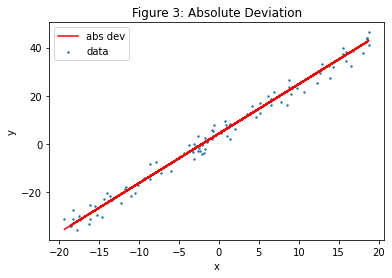

In [9]:
plt.scatter(x,y,label="data",s=2)
plt.plot(x,slp2*x+yint2,'r',label="abs dev")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 3: Absolute Deviation")

y2=slp2*x+yint2
rs2=calculating_R(y,y2)

# Data Fitting Using Least Square

$E_2(a_0,a_1)=\sum_{i=1}^{n}[y_i-(a_0x_i+a_1)]^2$

1.   **Least squares polynomial fit**: The Polynomial.fit class method is recommended for new code as it is more stable numerically. 
2.   **numpy.linalg.lstsq**: Return the least-squares solution to a linear matrix equation. Computes the vector x that approximately solves the equation $a @ x = b$. The equation may be under-, well-, or over-determined (i.e., the number of linearly independent rows of $a$ can be less than, equal to, or greater than its number of linearly independent columns). If $a$ is square and of full rank, then x (but for round-off error) is the “exact” solution of the equation. Else, x minimizes the Euclidean 2-norm $||b-ax||$. If there are multiple minimizing solutions, the one with the smallest 2-norm $||x||$is returned.

source: 

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq

**Linear least square: Least squares polynomial fit**

Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.

R^2 (coefficient of determinant)
0.986097984538334


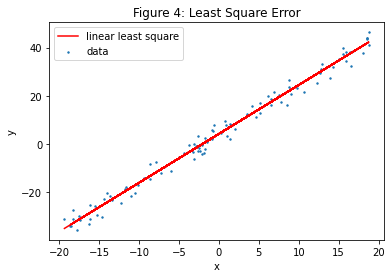

In [10]:
theta=np.polyfit(x,y,1)
plt.scatter(x,y,label="data",s=2)
plt.plot(x,theta[0]*x+theta[1],'r',label="linear least square",)
# plt.plot(x,slp1*x+yint1,"g",label="absoluate deviation")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 4: Least Square Error")
theta

y3=theta[0]*x+theta[1]
rs3=calculating_R(y,y3)

**Linear least square: lstsq**

We can rewrite the line equation as $y = Ap$, where A = [[$x$  1]] and $p = [[a_0], [a_1]]$. Now use lstsq to solve for p:

R^2 (coefficient of determinant)
0.986097984538334


(2.029160852571766, 4.185096419456243)

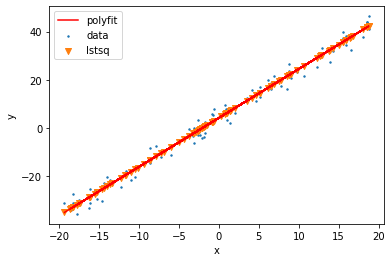

In [11]:
A=np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.scatter(x,y,label="data",s=2)
plt.scatter(x,m*x+c,marker='v',label="lstsq",)
plt.plot(x,theta[0]*x+theta[1],"r",label="polyfit")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
m,c

y4=m*x+c
calculating_R(y,y4)
m,c

# Comparison of Diff Approaches in Finding the Line of Best Fit

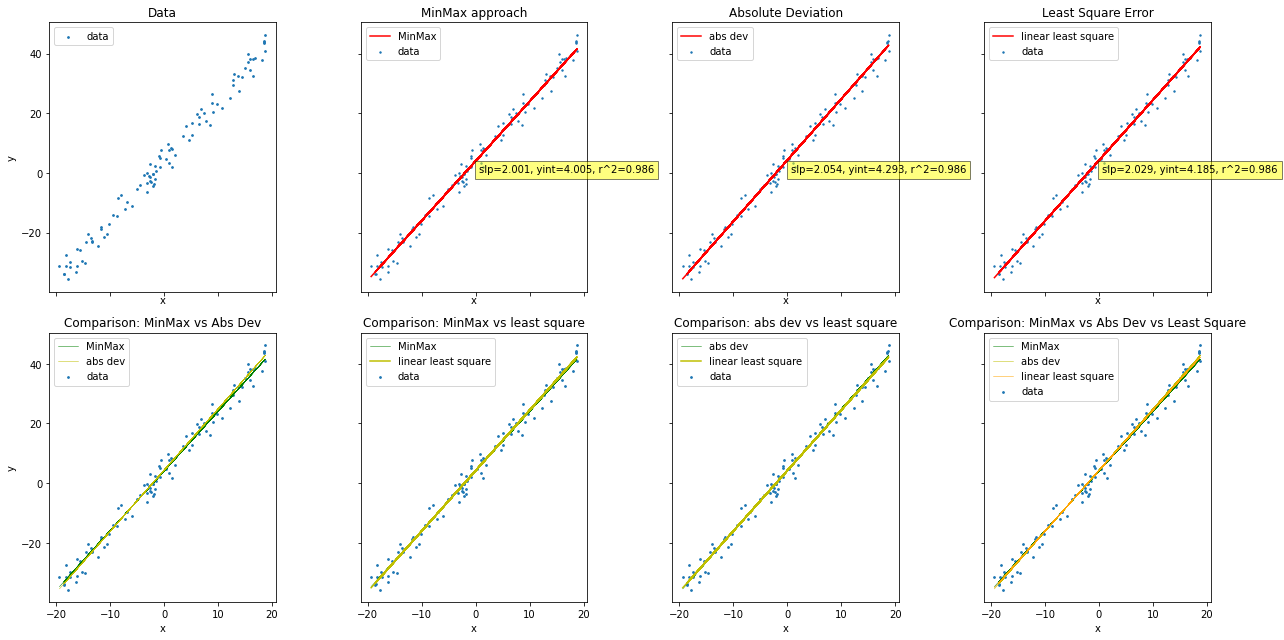

In [12]:
fig,axs=plt.subplots(2,4,figsize=(18,9),sharey=True,sharex=True)
#original data
axs[0,0].scatter(x,y,label="data",s=3)
axs[0,0].set_xlabel("x")
axs[0,0].set_ylabel("y")
axs[0,0].set_title("Data")
axs[0,0].legend()

#MinMax approach
axs[0,1].scatter(x,y,label="data",s=2)
axs[0,1].plot(x,slp1*x+yint1,'r',label="MinMax")
axs[0,1].legend()
axs[0,1].set_xlabel("x")
# axs[0,1].set_ylabel("y")
axs[0,1].set_title("MinMax approach")
axs[0,1].text(0.6,0.1,"slp=%5.3f, yint=%5.3f, r^2=%5.3f"%(slp1,yint1,rs1),bbox=dict(facecolor='yellow', alpha=0.5))

#abs dev
axs[0,2].scatter(x,y,label="data",s=2)
axs[0,2].plot(x,slp2*x+yint2,'r',label="abs dev")
axs[0,2].legend()
axs[0,2].set_xlabel("x")
# axs[0,2].set_ylabel("y")
axs[0,2].set_title("Absolute Deviation")
axs[0,2].text(0.6,0.1,"slp=%5.3f, yint=%5.3f, r^2=%5.3f"%(slp2,yint2,rs2),bbox=dict(facecolor='yellow', alpha=0.5))

#least square
axs[0,3].scatter(x,y,label="data",s=2)
axs[0,3].plot(x,theta[0]*x+theta[1],'r',label="linear least square",)
# plt.plot(x,slp1*x+yint1,"g",label="absoluate deviation")
axs[0,3].legend()
axs[0,3].set_xlabel("x")
# axs[0,3].set_ylabel("y")
axs[0,3].set_title("Least Square Error")
axs[0,3].text(0.6,0.1,"slp=%5.3f, yint=%5.3f, r^2=%5.3f"%(theta[0],theta[1],rs3),bbox=dict(facecolor='yellow', alpha=0.5))

#minmax and abs dev
axs[1,0].scatter(x,y,label="data",s=3)
axs[1,0].plot(x,slp1*x+yint1,'g',label="MinMax",linewidth=0.5)
axs[1,0].plot(x,slp2*x+yint2,'y',label="abs dev",linewidth=0.5)
axs[1,0].set_xlabel("x")
axs[1,0].set_ylabel("y")
axs[1,0].set_title("Comparison: MinMax vs Abs Dev")
axs[1,0].legend()

#minmax and least square
axs[1,1].scatter(x,y,label="data",s=3)
axs[1,1].plot(x,slp1*x+yint1,'g',label="MinMax",linewidth=0.5)
axs[1,1].plot(x,theta[0]*x+theta[1],'y',label="linear least square")
axs[1,1].set_xlabel("x")
# axs[1,1].set_ylabel("y")
axs[1,1].set_title("Comparison: MinMax vs least square")
axs[1,1].legend()

#abs dev and least square
axs[1,2].scatter(x,y,label="data",s=3)
axs[1,2].plot(x,slp2*x+yint2,'g',label="abs dev",linewidth=0.5)
axs[1,2].plot(x,theta[0]*x+theta[1],'y',label="linear least square")
axs[1,2].set_xlabel("x")
axs[1,2].set_title("Comparison: abs dev vs least square")
axs[1,2].legend()

#all
axs[1,3].scatter(x,y,label="data",s=3)
axs[1,3].plot(x,slp1*x+yint1,'g',label="MinMax",linewidth=0.5)
axs[1,3].plot(x,slp2*x+yint2,'y',label="abs dev",linewidth=0.5)
axs[1,3].plot(x,theta[0]*x+theta[1],'orange',label="linear least square",linewidth=0.5)
axs[1,3].set_xlabel("x")
axs[1,3].legend()
axs[1,3].set_title("Comparison: MinMax vs Abs Dev vs Least Square")
fig.tight_layout()


# Comparison of Diff LP Algorithms 1

There are many algorithms for solving LP problems:
*   **Simplex algorithm**: In the feasible region(“compact domain”), x moves from vertex to vertex in direction of c. The algorithm is simple and works well in practice, but runs in exponential time in the worst case.
*   **Ellipsoid algorithm**: It starts with an ellipsoid that includes the optimal solution, and keeps shrinking the ellipsoid until the optimal solution is found. This was the first poly-time algorithm. However, the algorithm is impractical in practice.
*   **Interior Point Method:** x moves inside the polytope following c. This algorithm runs in poly-time and is practical.

The algorithm used to solve the standard form problem. ‘highs-ds’, ‘highs-ipm’, ‘highs’, ‘interior-point’ (default), ‘revised simplex’, and ‘simplex’ (legacy) are supported.

In [13]:
#function that outputs the total number of iterations performed in all phases.


#problem1: maximize x1+x2 example 
func1=np.array([-1,-1])#"c"; objective function to be minimized
A_u1=np.array([[-1,1],[1,6],[4,-1]])#"A_ub"
b_u1=np.array([1,15,10])#"b_ub"
bounds=[b1,b2]#bounds for decision variables
def different_algorithms(func1,A_u1,b_u1,bounds=None,A_eq1=None, b_eq1=None):
  #no such constraints for "A_eq" and "b_eq"

  #simplex algorithm
  print("simplex algorithm")
  start_time = time.time()
  res=linprog(func1,A_ub=A_u1,b_ub=b_u1,A_eq=A_eq1, b_eq=b_eq1,bounds=bounds,method="simplex")#applying linprog
  end_time = time.time()
  print(res)
  iter1=res.nit#number of ierations
  v1=res.fun#the value for our objective function
  t1=end_time-start_time
  print("---------------------------------")

  #interior point method
  print("interior-point")
  start_time1 = time.time()
  res1=linprog(func1,A_ub=A_u1,b_ub=b_u1,A_eq=A_eq1, b_eq=b_eq1,bounds=bounds,method="interior-point")#applying linprog
  end_time1 = time.time()
  print(res1)
  iter2=res1.nit
  v2=res1.fun
  t2=end_time1-start_time1
  print()
  return iter1,iter2,v1,v2,t1,t2

i1,i2,v1,v2,t1,t2=different_algorithms(func1,A_u1,b_u1,bounds)


df=pd.DataFrame(np.zeros((3,6)),['# of iterations','running time','objective function value'],["simplex1","interior-point1","simplex2","interior-point2","simplex3","interior-point3"])
df.iat[0,0]=i1
df.iat[0,1]=i2
df.iat[1,0]=t1
df.iat[1,1]=t2
df.iat[2,0]=v1
df.iat[2,1]=v2

simplex algorithm
     con: array([], dtype=float64)
     fun: -5.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([2.00000000e+00, 1.77635684e-15, 0.00000000e+00])
  status: 0
 success: True
       x: array([3., 2.])
---------------------------------
interior-point
     con: array([], dtype=float64)
     fun: -4.999999999582599
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([2.00000000e+00, 1.61717040e-09, 4.69835726e-10])
  status: 0
 success: True
       x: array([3., 2.])



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [14]:
def different_algorithms_all(func1,A_u1,b_u1,md,bounds=None,A_eq1=None, b_eq1=None):
  #no such constraints for "A_eq" and "b_eq"

  start_time = time.time()
  res=linprog(func1,A_ub=A_u1,b_ub=b_u1,A_eq=A_eq1, b_eq=b_eq1,bounds=bounds,method=md)#applying linprog
  end_time = time.time()
  print(res)
  iter1=res.nit#number of ierations
  v1=res.fun#the value for our objective function
  t1=end_time-start_time

  print()
  return iter1,v1,t1



def diff_al_all(func1,A_u1,b_u1,bounds=None,A_eq1=None, b_eq1=None):
  #simplex
  i1,v1,t1=different_algorithms_all(func1,A_u1,b_u1,"simplex",bounds,A_eq1, b_eq1)
  #interior point
  i2,v2,t2=different_algorithms_all(func1,A_u1,b_u1,"interior-point",bounds,A_eq1, b_eq1)
  #revised simplex
  i3,v3,t3=different_algorithms_all(func1,A_u1,b_u1,"revised simplex",bounds,A_eq1, b_eq1)
  # #highs-ipm
  # i4,v4,t4=different_algorithms_all(func1,A_u1,b_u1,"highs-ipm",bounds,A_eq1, b_eq1)
  # #highs-ds
  # i5,v5,t5=different_algorithms_all(func1,A_u1,b_u1,"#highs-ds",bounds,A_eq1, b_eq1)
  # #highs
  # i6,v6,t6=different_algorithms_all(func1,A_u1,b_u1,"#highs",bounds,A_eq1, b_eq1)

  iters=np.array([i1,i2,i3])
  values=np.array([v1,v2,v3])
  ts=np.array([t1,t2,t3])
  return iters,values,ts

diff_al_all(func1,A_u1,b_u1,bounds=None,A_eq1=None, b_eq1=None)

     con: array([], dtype=float64)
     fun: -5.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([2.00000000e+00, 1.77635684e-15, 0.00000000e+00])
  status: 0
 success: True
       x: array([3., 2.])

     con: array([], dtype=float64)
     fun: -4.999999999582599
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([2.00000000e+00, 1.61717040e-09, 4.69835726e-10])
  status: 0
 success: True
       x: array([3., 2.])

     con: array([], dtype=float64)
     fun: -5.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([2., 0., 0.])
  status: 0
 success: True
       x: array([3., 2.])



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(array([3, 4, 2]),
 array([-5., -5., -5.]),
 array([0.00510287, 0.01289296, 0.00356483]))

In [15]:
#problem2: minmax problem
ONE=np.ones(len(x))
A_upper=np.column_stack((x,ONE))
A_upper=np.column_stack((A_upper,-ONE))
A_lower=np.column_stack((-x,-ONE))
A_lower=np.column_stack((A_lower,-ONE))
A_up=np.vstack((A_upper,A_lower))
b_u=np.concatenate((y, -y), axis=None)
i3,i4,v3,v4,t3,t4=different_algorithms(np.array([0,0,1]),A_up,b_u)
df.iat[0,2]=i3
df.iat[0,3]=i4
df.iat[1,2]=t3
df.iat[1,3]=t4
df.iat[2,2]=v3
df.iat[2,3]=v4


simplex algorithm
     con: array([], dtype=float64)
     fun: 4.9777779120534875
 message: 'Optimization terminated successfully.'
     nit: 211
   slack: array([ 5.68969111e+00,  5.76487965e+00,  8.09417064e+00,  6.52040110e+00,
        5.18612648e+00,  2.45610969e+00,  9.95555582e+00,  8.57078083e+00,
        3.79713800e+00,  6.72427247e+00,  6.82559972e+00,  1.29281693e+00,
        9.77965794e+00,  6.12326512e+00,  2.72055773e-02,  9.39038386e+00,
        3.61963417e+00,  3.11482838e+00,  4.34953394e+00,  5.80565731e+00,
        1.54747764e+00,  4.11897234e+00,  4.92720200e+00,  6.55067721e+00,
        8.53732596e+00,  5.65005865e+00,  6.00048421e+00,  7.74317348e+00,
        1.62519695e+00,  9.45244260e+00,  4.12330747e+00,  2.71568040e+00,
        1.77179816e+00,  4.54284892e+00,  6.44830083e+00,  7.74886962e+00,
        3.45116080e+00,  1.51804636e-02,  3.29631622e+00,  7.74201300e-01,
        5.80558202e+00,  8.66201156e+00,  2.38615317e+00,  9.07760433e+00,
        6.01035579e

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [16]:
#problem3: abs dev problem
A_upp=np.column_stack((x,ONE))
I=np.identity(len(x))
A_upp=np.column_stack((A_upp,-I))
A_lw=np.column_stack((-x,-ONE))
A_lw=np.column_stack((A_lw,-I))
A_up1=np.vstack((A_upp,A_lw))
b_u1=np.concatenate((y, -y), axis=None)
f=np.array([0,0])
f=np.concatenate((f, ONE), axis=None)
i5,i6,v5,v6,t5,t6=different_algorithms(f,A_up1,b_u1)

simplex algorithm
     con: array([], dtype=float64)
     fun: 223.02952418576874
 message: 'Optimization terminated successfully.'
     nit: 368
   slack: array([ 1.14622429e+00,  2.23583192e+00,  4.29122736e+00,  3.94024572e+00,
        5.65375896e-01, -8.52651283e-14,  1.12982044e+01,  6.17359184e+00,
       -2.13162821e-14,  3.09759011e+00,  2.43595178e+00,  2.13162821e-14,
        7.04754853e+00,  3.63486982e+00,  2.48689958e-14,  9.07891449e+00,
       -1.42108547e-14, -1.77635684e-14,  1.31450406e-13, -4.26325641e-14,
        2.48689958e-14,  6.39488462e-14, -3.55271368e-15,  2.42725141e+00,
        8.01853544e+00,  1.29762096e+00,  3.09987535e+00,  6.65401222e+00,
        7.10542736e-14,  8.65342059e+00,  1.77635684e-14,  7.10542736e-15,
        2.48689958e-14,  4.61852778e-14,  1.01016707e+00,  5.04854798e+00,
       -8.88178420e-15,  0.00000000e+00,  2.48689958e-14, -8.88178420e-16,
        1.53947827e+00,  6.06026525e+00, -6.66133815e-15,  7.53748728e+00,
        3.33100500e

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [17]:
df.iat[0,4]=i5
df.iat[0,5]=i6
df.iat[1,4]=t5
df.iat[1,5]=t6
df.iat[2,4]=v5
df.iat[2,5]=v6
print(df)

                          simplex1  interior-point1    simplex2  \
# of iterations           3.000000         4.000000  211.000000   
running time              0.005004         0.008721    0.716858   
objective function value -5.000000        -5.000000    4.977778   

                          interior-point2    simplex3  interior-point3  
# of iterations                  9.000000  368.000000         8.000000  
running time                     0.123515    1.266791         0.103543  
objective function value         4.977778  223.029524       223.029524  


# Comparison of Diff LP Algorithms2: Visualizations

Text(0.5, 0.98, 'Simplex Algorithm versus Interior-Point Method')

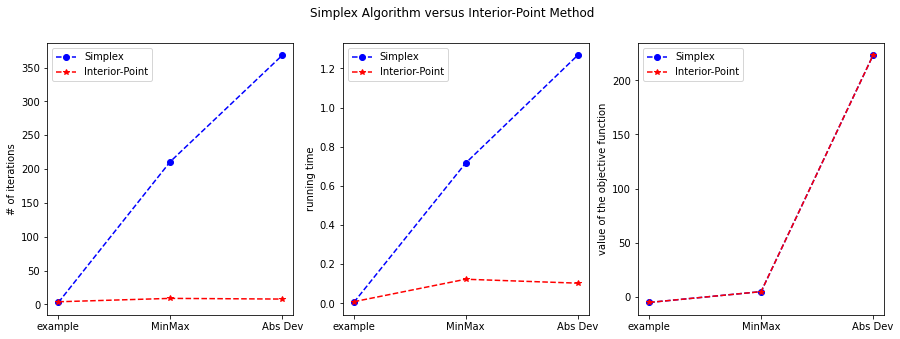

In [18]:
#simplex algorithm
xt=["example","MinMax","Abs Dev"]
iters1=np.array([i1,i3,i5])
rt1=np.array([t1,t3,t5])
ofvalue1=np.array([v1,v3,v5])
#interior point
iters2=np.array([i2,i4,i6])
rt2=np.array([t2,t4,t6])
ofvalue2=np.array([v2,v4,v6])

fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].plot(xt,iters1,'bo--',label="Simplex")
axs[0].plot(xt,iters2,'r*--',label="Interior-Point")
axs[0].legend()
axs[0].set_ylabel("# of iterations")

axs[1].plot(xt,rt1,'bo--',label="Simplex")
axs[1].plot(xt,rt2,'r*--',label="Interior-Point")
axs[1].set_ylabel("running time")
axs[1].legend()

axs[2].plot(xt,ofvalue1,'bo--',label="Simplex")
axs[2].plot(xt,ofvalue2,'r*--',label="Interior-Point",)
axs[2].set_ylabel("value of the objective function")
axs[2].legend()

fig.suptitle("Simplex Algorithm versus Interior-Point Method")